In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [23]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92,45.0,27,31,NaN
1,85.0,64,59.0,32,23,0.0
2,86.0,54,33.0,16,54,0.0
3,91.0,78,34.0,24,36,0.0
4,98.0,55,13.0,17,17,0.0
...,...,...,...,...,...,...
340,91.0,54,25.0,22,35,4.0
341,89.0,48,32.0,22,14,4.0
342,85.0,52,22.0,23,34,4.0
343,95.0,93,21.0,27,47,6.0


In [24]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	3
int64		column 2	0
float64		column 3	9
int64		column 4	0
int64		column 5	0
float64		column 6	6


In [25]:

df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,342.000000,345.000000,336.000000,345.000000,345.000000,339.000000
mean,90.154971,69.869565,30.086310,24.643478,38.284058,3.474926
std,4.446088,18.347670,18.420341,10.064494,39.254616,3.342410
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,20.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,92.750000,80.000000,34.000000,27.000000,46.000000,6.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

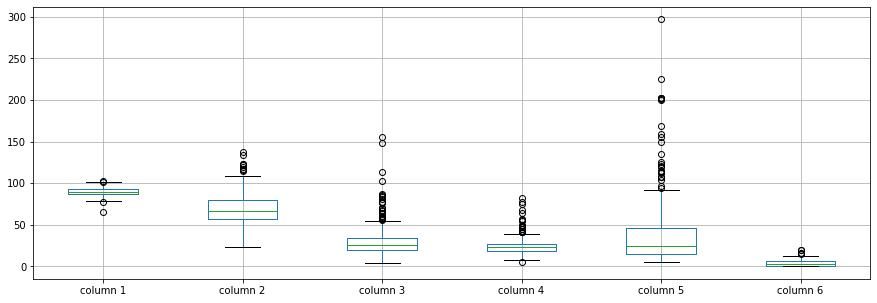

In [26]:
df.boxplot(return_type='axes', figsize=(15,5))

In [27]:
df.mean()

column 1    90.154971
column 2    69.869565
column 3    30.086310
column 4    24.643478
column 5    38.284058
column 6     3.474926
dtype: float64

In [28]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.055101,0.144805,0.194114,0.226197,0.325143
column 2,0.055101,1.000000,0.120075,0.146057,0.133140,0.105354
column 3,0.144805,0.120075,1.000000,0.706466,0.495405,0.210525
column 4,0.194114,0.146057,0.706466,1.000000,0.527626,0.283001
column 5,0.226197,0.133140,0.495405,0.527626,1.000000,0.342416
column 6,0.325143,0.105354,0.210525,0.283001,0.342416,1.000000


In [29]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [30]:
imputer = md.Midas(layer_structure = [6,6+28,6+28+28,6+28+28+28,6+28+28+28+28,6+28+28+28,6+28+28,6+28,6], vae_layer = False, seed = 280)
imputer.build_model(df)
imputer.train_model(training_epochs=28)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 277.2057393391927
Epoch: 1 , loss: 278.01907493954616
Epoch: 2 , loss: 277.7641405378069
Epoch: 3 , loss: 279.3629382905506
Epoch: 4 , loss: 279.71038237072173
Epoch: 5 , loss: 279.58414059593565
Epoch: 6 , loss: 277.88452802385603
Epoch: 7 , loss: 278.1747690836589
Epoch: 8 , loss: 278.75836472284226
Epoch: 9 , loss: 278.57987830752415
Epoch: 10 , loss: 276.8247397286551
Epoch: 11 , loss: 278.558845883324
Epoch: 12 , loss: 277.794425601051
Epoch: 13 , loss: 278.77770269484745
Epoch: 14 , loss: 277.43878755115327
Epoch: 15 , loss: 274.96763610839844
Epoch: 16 , loss: 279.07173229399183
Epoch: 17 , loss: 279.4738573346819
Epoch: 18 , loss: 279.4534170968192
Epoch: 19 , loss: 277.1783156622024
Epoch: 20 , loss: 278.9532703218006
Epoch: 21 , loss: 278.9772455124628
Epoch: 22 , loss: 277.6400306338356
Epoch: 23 , loss: 277.20321291968935
Epoch: 24 , loss: 277.4700273786272
Epoch: 25 , loss: 278.196035475957

In [31]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [32]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [33]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [34]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.0,0,0.0,0,0,0.038508
1,0.0,0,0.0,0,0,0.000000
2,0.0,0,0.0,0,0,0.000000
3,0.0,0,0.0,0,0,0.000000
4,0.0,0,0.0,0,0,0.000000
...,...,...,...,...,...,...
340,0.0,0,0.0,0,0,0.000000
341,0.0,0,0.0,0,0,0.000000
342,0.0,0,0.0,0,0,0.000000
343,0.0,0,0.0,0,0,0.000000


Calculating NRMSE Value

In [35]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [36]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [37]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

238.42328360112296

In [38]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [39]:
NRMS=numerator/denominator
NRMS


0.09462134713565025

In [40]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [41]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92,45.0,27,31,0.038508
1,85.0,64,59.0,32,23,0.000000
2,86.0,54,33.0,16,54,0.000000
3,91.0,78,34.0,24,36,0.000000
4,98.0,55,13.0,17,17,0.000000
...,...,...,...,...,...,...
340,91.0,54,25.0,22,35,4.000000
341,89.0,48,32.0,22,14,4.000000
342,85.0,52,22.0,23,34,4.000000
343,95.0,93,21.0,27,47,6.000000


In [42]:
imputations[-1].to_excel("Bupa_NL_1(imp).xlsx", index=False, header=False)